## 싸인 함수 회귀분석 (Sine Regression)

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.3.0


In [3]:
# 런타임에서 할당하는데 필요한 양만큼의 GPU 메모리를 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    tf.config.experimental.set_memory_growth(gpus[1], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

## 데이터 생성

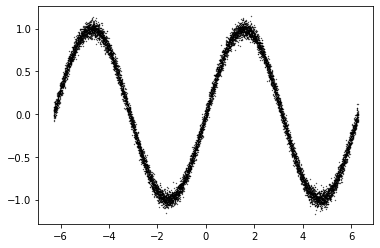

In [4]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [5]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=[1]),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

## 모델 훈련

In [6]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

model.fit(inputs, outputs, epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 0.2874 - mae: 0.4566 - mse: 0.2874
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1456 - mae: 0.3029 - mse: 0.1456
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1418 - mae: 0.2905 - mse: 0.1418
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1424 - mae: 0.2908 - mse: 0.1424
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1399 - mae: 0.2876 - mse: 0.1399
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1359 - mae: 0.2831 - mse: 0.1359
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1301 - mae: 0.2761 - mse: 0.1301
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1144 - mae: 0.2541 - mse: 0.1144
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0824 - mae: 0.2048 - mse: 0.0824
Epoch 10/20
313/313

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [13]:
!ls

'Day3-1. dnn_sine_regression_keras.ipynb'
'Day3-2. dnn_spiral_classification_keras.ipynb'
'Day3-3. dnn_fashionmnist_classification.ipynb'
'Day3-3. dnn_fashionmnist_classification_modelchange.ipynb'
 saved_model
 saved_weight


In [9]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [10]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/my_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [17]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [16]:
print(tflite_quant_model)

b' \x00\x00\x00TFL3\x00\x00\x00\x00\x00\x00\x12\x00\x1c\x00\x04\x00\x08\x00\x0c\x00\x10\x00\x14\x00\x00\x00\x18\x00\x12\x00\x00\x00\x03\x00\x00\x00h\x0e\x00\x00\xec\x08\x00\x00\xd4\x08\x00\x00<\x00\x00\x00\x04\x00\x00\x00\x01\x00\x00\x00\x0c\x00\x00\x00\x08\x00\x0c\x00\x04\x00\x08\x00\x08\x00\x00\x00\x08\x00\x00\x00\x0b\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x0c\x00\x00\x00\x88\x08\x00\x00t\x08\x00\x00\x08\x08\x00\x00\x94\x07\x00\x00\x80\x07\x00\x00\x1c\x07\x00\x00\xc8\x00\x00\x00d\x00\x00\x00X\x00\x00\x00D\x00\x00\x000\x00\x00\x00\x04\x00\x00\x00&\xf8\xff\xff\x04\x00\x00\x00\x10\x00\x00\x001.5.0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xf2\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00p\xf2\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xf2\xff\xff\x00\x00\x00\x00v\xf8\xff\xff\x04\x00\x00\x00P\x00\x00\x00iF\xa4\xbe\x15\xa7\xfa>?\xdd\xc8>\xf2\xf7\xb1\xbeT]\x1d>>\xd2\xf1>W\x8d\xf6>\x90\r5\xbf\x83\xe5\x

In [14]:
model.save_weights('saved_weight/my_model_origin')

In [15]:
tflite_quant_model.save_weights('saved_weight/my_model_quant')

AttributeError: 'bytes' object has no attribute 'save_weights'

In [26]:
test_loss, test_mse, test_mae = model.evaluate(inputs, outputs, verbose=0)
print('\n테스트 MSE:', test_mse)


테스트 MSE: 0.046272732


## 테스트

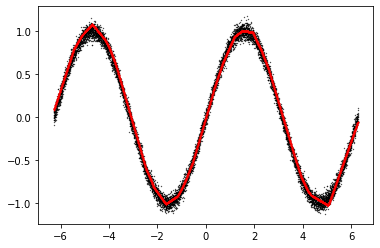

In [28]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)